In [66]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from datetime import time
import glob
import scipy
import scipy.stats
import statsmodels.api as sm
import pylab

In [2]:
data = pd.read_csv('/Users/Ivan Junqi Wu/Desktop/EBA5002.csv')

In [3]:
data = pd.DataFrame(data)

In [4]:
data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,Days_in_TopTrending,like_rate,willing_to_like,willing_to_comment,like_or_not,category
0,MJO3FmmFuh4,5/2/18 0:00,Budweiser - Original Whazzup? ad,dannotv,24,23/7/06 8:24,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,"Original Whazzup ad - however, there is a litt...",4214,0.751227,0.002364,0.000317,0,Entertainment
1,UQtt9I6c-YM,9/1/18 0:00,Kramer vs Kramer-Clou Scene,Livia Giustiniani,1,5/4/08 18:22,"Meryl|""Streep""|""kramer""|""vs""|""dustin""|""hoffman...",50168,46,6,26,Poor Meryl...she was really scaredxD,3565,0.884615,0.001037,0.000518,0,Film & Animation
2,wFEAoF7RC7Y,28/11/17 0:00,Behind The Sounds: That's Not Me,BehindTheSounds,10,17/6/08 0:07,"Beach|""Boys""|""Brian""|""Wilson""|""Dennis""|""Carl""|...",86897,469,4,106,A video detailing the creative process behind ...,3450,0.991543,0.005443,0.001220,1,Music
3,Y8JGfi4MJ8k,28/11/17 0:00,SAOIRSE RONAN - MORONIC (IRONIC),flirppy242,10,7/8/08 12:16,"SAOIRSE|""RONAN""|""MORONIC""|""IRONIC""|""IZZIE""|""CO...",26830,79,1,8,EL NOVIO DE MI MADRE,3399,0.987500,0.002982,0.000298,1,Music
4,rO_mAQC9bv0,20/11/17 0:00,Amazon.com commercial Xmas 1999Magnetic Whale Art,astroboy1960,1,10/3/09 0:27,"amazon|""commerical""|""y2k""|""sing""|""along""|""mitc...",15476,34,1,10,IMHO the best of Amazon's Christmas 1999 ads. ...,3176,0.971429,0.002262,0.000646,1,Film & Animation


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6168 entries, 0 to 6167
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_id             6168 non-null   object 
 1   trending_date        6168 non-null   object 
 2   title                6168 non-null   object 
 3   channel_title        6168 non-null   object 
 4   category_id          6168 non-null   int64  
 5   publish_time         6168 non-null   object 
 6   tags                 6168 non-null   object 
 7   views                6168 non-null   int64  
 8   likes                6168 non-null   int64  
 9   dislikes             6168 non-null   int64  
 10  comment_count        6168 non-null   int64  
 11  description          6164 non-null   object 
 12  Days_in_TopTrending  6168 non-null   int64  
 13  like_rate            6168 non-null   float64
 14  willing_to_like      6168 non-null   float64
 15  willing_to_comment   6168 non-null   f

In [6]:
new = data[['views','likes','comment_count','Days_in_TopTrending']]

In [7]:
new.info

<bound method DataFrame.info of         views   likes  comment_count  Days_in_TopTrending
0      258506     459             82                 4214
1       50168      46             26                 3565
2       86897     469            106                 3450
3       26830      79              8                 3399
4       15476      34             10                 3176
...       ...     ...            ...                  ...
6163    88560    1111           2128                    0
6164    28378     211            633                    0
6165   881266   43290          19656                    0
6166  1063552  139090          10279                    0
6167   425866    2018           2497                    0

[6168 rows x 4 columns]>

In [8]:
# in online video websites, views, comments, days on top trendings are normally related to likes.
# in this project, we aim to find the highly liked video for customers to place ads and maximize our and the customers' profits,
# we have to figure out which influence the likes in US YouTube market

Text(0.5, 1.0, 'Correlation of Likes and Days in Top Trending')

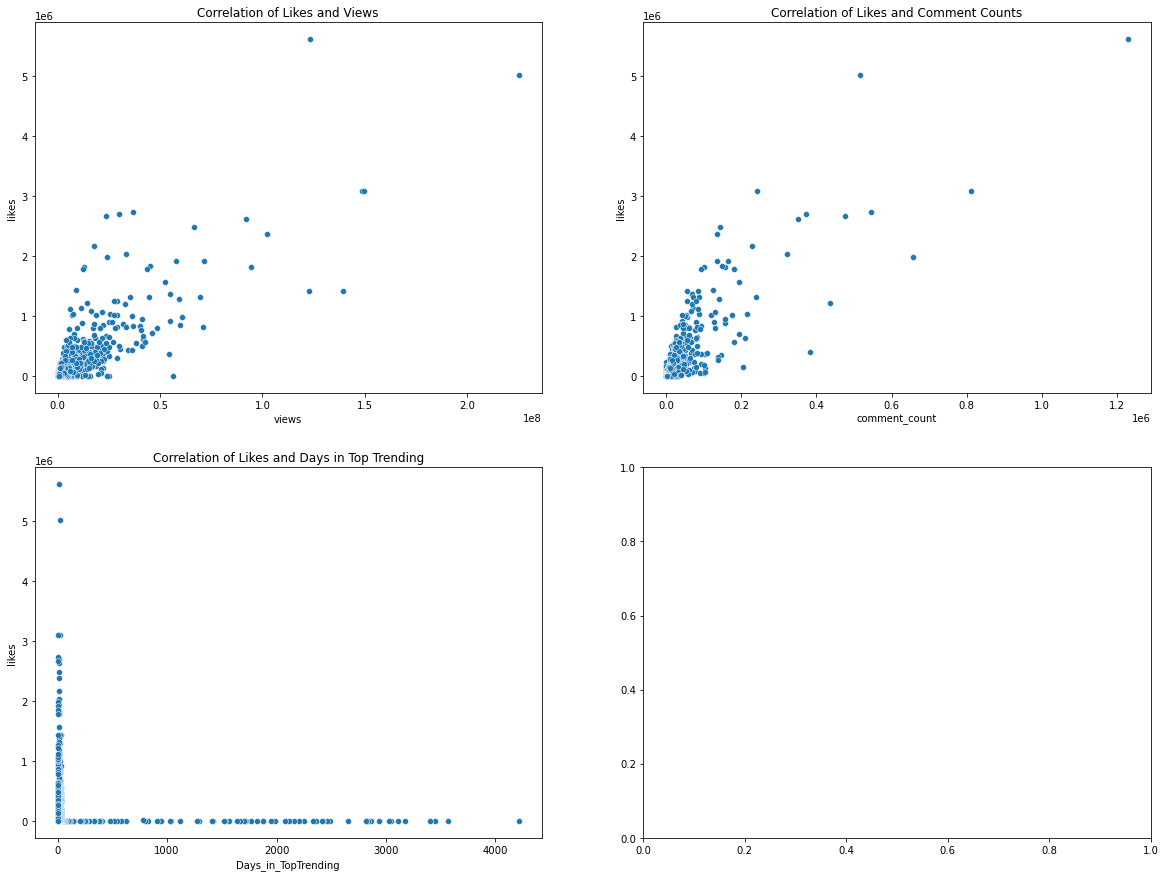

In [9]:
f, ax = plt.subplots(2,2,figsize=(20,15))
# 1st chart (likes : views)
g = sns.scatterplot(x=new['views'],y=new['likes'],data=new,ax=ax[0][0])
g.set_title('Correlation of Likes and Views')
# 2nd chart (likes : communt_count)
g1 = sns.scatterplot(x=new['comment_count'],y=new['likes'],data=new,ax=ax[0][1])
g1.set_title('Correlation of Likes and Comment Counts')
# 3rd chart (likes : Days_in_TopTrending)
g1 = sns.scatterplot(x=new['Days_in_TopTrending'],y=new['likes'],data=new,ax=ax[1][0])
g1.set_title('Correlation of Likes and Days in Top Trending')

In [10]:
# From the scatter plots, it is seemed that views and comments have some relations with likes, while days on top trendings
# has no relation with likes.

(4.5, -0.5)

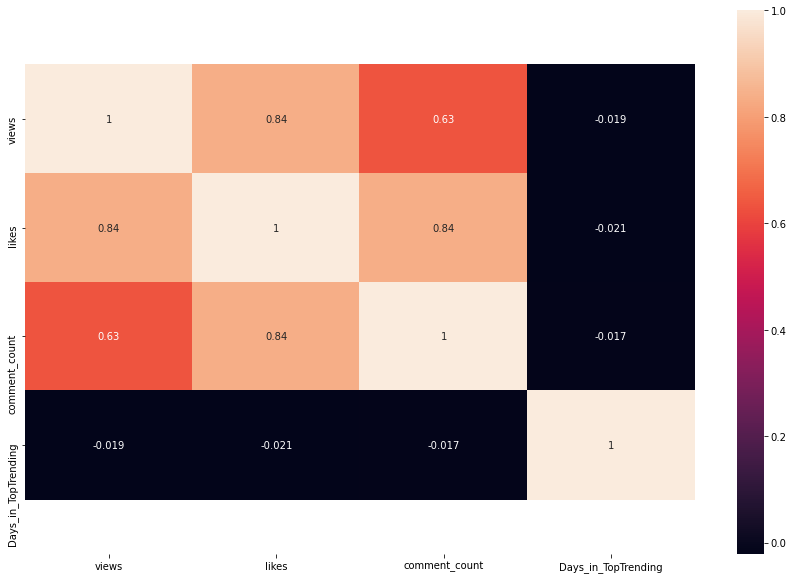

In [11]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(new.corr(),annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [12]:
# From this correlation matrix, we can know that views had the strongly positive relations with likes
# and comments has the moderately positive relations with likes
# while the correlation for days on top trendings and likes is approximately 0, which means no relation is between them.

In [13]:
# check the relation between likes and category.
# anova can be used for this.
# anova has three assumptions.
# before we apply anova, we first check the normality and homogeneity of variance.
# Sharopi-Wilk test is used for checking normality.
# Levene is used for checking homogeneity of variance.

In [14]:
# we first draw the boxplot to have basic understanding of the relation between categories and likes.

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


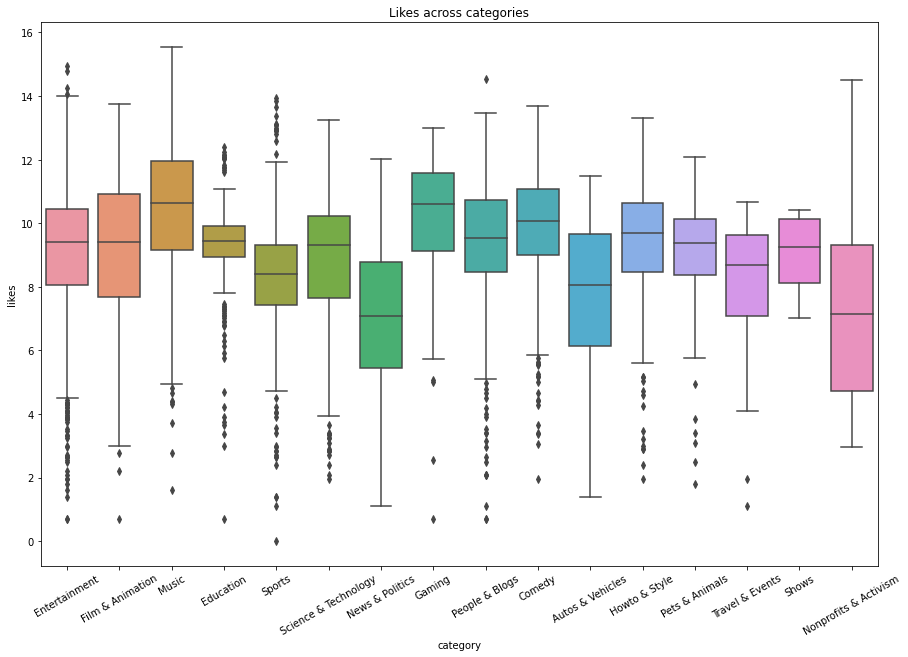

In [15]:
plt.figure(figsize=(15,10))
g = sns.boxplot(x=data['category'],y=np.log(data['likes']),data=data)
g.set_xticklabels(g.get_xticklabels(),rotation=30)
plt.title('Likes across categories')
plt.show()

In [16]:
data1 = data[data.category=='Autos & Vehicles']

In [17]:
scipy.stats.shapiro(data1['likes'])

ShapiroResult(statistic=0.6795760989189148, pvalue=6.703000654528779e-11)

In [18]:
# p-value is < 0.05, reject H0, there is no normality.

In [19]:
data2 = data[data.category=='Comedy']

In [20]:
scipy.stats.shapiro(data2['likes'])

ShapiroResult(statistic=0.5887677073478699, pvalue=1.4291656643877525e-33)

In [21]:
# p-value is < 0.05, reject H0, there is no normality.

In [22]:
data3 = data[data.category=='Education']

In [23]:
scipy.stats.shapiro(data3['likes'])

ShapiroResult(statistic=0.47967445850372314, pvalue=4.4969034391051244e-26)

In [24]:
# p-value is < 0.05, reject H0, there is no normality.

In [25]:
data4 = data[data.category=='Entertainment']

In [26]:
scipy.stats.shapiro(data4['likes'])

ShapiroResult(statistic=0.2365012764930725, pvalue=0.0)

In [27]:
# p-value is < 0.05, reject H0, there is no normality.

In [28]:
data5 = data[data.category=='Film & Animation']

In [29]:
scipy.stats.shapiro(data5['likes'])

ShapiroResult(statistic=0.5488941669464111, pvalue=8.92005720433123e-28)

In [30]:
# p-value is < 0.05, reject H0, there is no normality.

In [31]:
data6 = data[data.category=='Gaming']

In [32]:
scipy.stats.shapiro(data6['likes'])

ShapiroResult(statistic=0.7829561829566956, pvalue=1.0245226889082915e-10)

In [33]:
# p-value is < 0.05, reject H0, there is no normality.

In [34]:
data7 = data[data.category=='Howto & Style']

In [35]:
scipy.stats.shapiro(data7['likes'])

ShapiroResult(statistic=0.5848355889320374, pvalue=4.0655688943512907e-35)

In [36]:
# p-value is < 0.05, reject H0, there is no normality.

In [37]:
data8 = data[data.category=='Music']

In [38]:
scipy.stats.shapiro(data8['likes'])

ShapiroResult(statistic=0.42112308740615845, pvalue=2.1019476964872256e-44)

In [39]:
# p-value is < 0.05, reject H0, there is no normality.

In [40]:
data9 = data[data.category=='News & Politics']

In [41]:
scipy.stats.shapiro(data9['likes'])

ShapiroResult(statistic=0.4388233423233032, pvalue=4.4459830878894946e-36)

In [42]:
# p-value is < 0.05, reject H0, there is no normality.

In [43]:
data10 = data[data.category=='Nonprofits & Activism']

In [44]:
scipy.stats.shapiro(data10['likes'])

ShapiroResult(statistic=0.38946741819381714, pvalue=1.6353011460523703e-06)

In [45]:
# p-value is < 0.05, reject H0, there is no normality.

In [46]:
data11 = data[data.category=='People & Blogs']

In [47]:
scipy.stats.shapiro(data11['likes'])

ShapiroResult(statistic=0.3372204899787903, pvalue=6.186580819240535e-38)

In [48]:
# p-value is < 0.05, reject H0, there is no normality.

In [49]:
data12 = data[data.category=='Pets & Animals']

In [50]:
scipy.stats.shapiro(data12['likes'])

ShapiroResult(statistic=0.6449358463287354, pvalue=1.3438692545402728e-16)

In [51]:
# p-value is < 0.05, reject H0, there is no normality.

In [52]:
data13 = data[data.category=='Science & Technology']

In [53]:
scipy.stats.shapiro(data13['likes'])

ShapiroResult(statistic=0.5032356977462769, pvalue=8.259774684866438e-31)

In [54]:
# p-value is < 0.05, reject H0, there is no normality.

In [55]:
data14 = data[data.category=='Shows']

In [56]:
scipy.stats.shapiro(data14['likes'])

ShapiroResult(statistic=0.9126090407371521, pvalue=0.4963341951370239)

In [57]:
# p-value is > 0.05, do not reject H0, there is no normality.

In [58]:
data15 = data[data.category=='Sports']

In [59]:
scipy.stats.shapiro(data15['likes'])

ShapiroResult(statistic=0.246770441532135, pvalue=1.5595023984800067e-38)

In [60]:
# p-value is < 0.05, reject H0, there is no normality.

In [61]:
data16 = data[data.category=='Travel & Events']

In [62]:
scipy.stats.shapiro(data16['likes'])

ShapiroResult(statistic=0.8341526985168457, pvalue=1.2627485830307705e-06)

In [63]:
# p-value is < 0.05, reject H0, there is no normality.

In [64]:
# Among all results above, only 1 result has normality and others do not have.

In [65]:
Autos_Vehicles = data1['likes']
Comedy = data2['likes']
Education = data3['likes']
Entertainment = data4['likes']
Film_Animation = data5['likes']
Gaming = data6['likes']
Howto_Style = data7['likes']
Music = data8['likes']
News_Politics = data9['likes']
Nonprofits_Activism = data10['likes']
People_Blogs = data11['likes']
Pets_Animals = data12['likes']
Science_Technology = data13['likes']
Shows = data14['likes']
Sports = data15['likes']
Travel_Events = data16['likes']

In [ ]:
# In addtion, we use Q-Q plot to check normality.

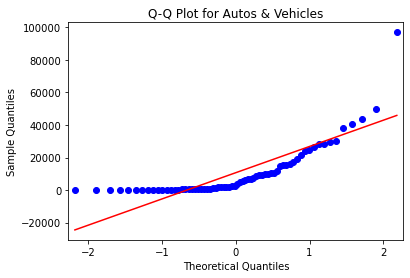

In [71]:
sm.qqplot(Autos_Vehicles, line='s')
pylab.title('Q-Q Plot for Autos & Vehicles')
pylab.show()

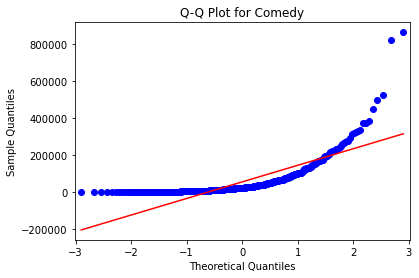

In [72]:
sm.qqplot(Comedy, line='s')
pylab.title('Q-Q Plot for Comedy')
pylab.show()

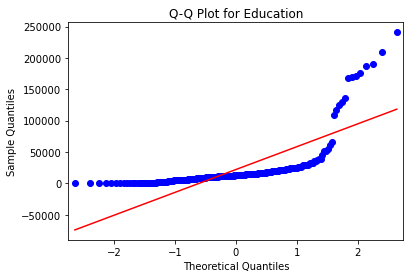

In [75]:
sm.qqplot(Education, line='s')
pylab.title('Q-Q Plot for Education')
pylab.show()

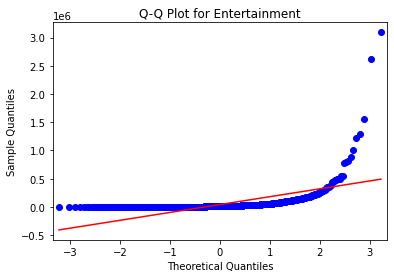

In [76]:
sm.qqplot(Entertainment, line='s')
pylab.title('Q-Q Plot for Entertainment')
pylab.show()

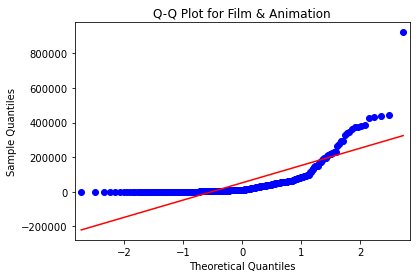

In [77]:
sm.qqplot(Film_Animation, line='s')
pylab.title('Q-Q Plot for Film & Animation')
pylab.show()

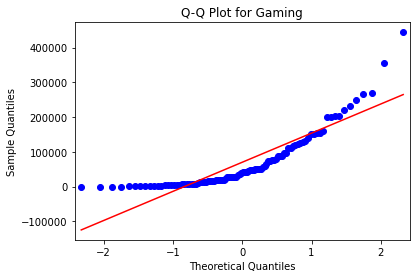

In [78]:
sm.qqplot(Gaming, line='s')
pylab.title('Q-Q Plot for Gaming')
pylab.show()

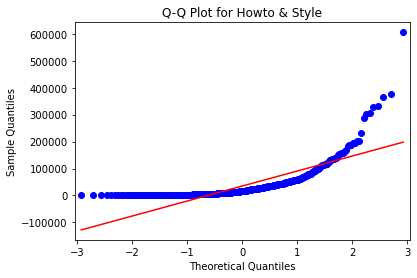

In [79]:
sm.qqplot(Howto_Style, line='s')
pylab.title('Q-Q Plot for Howto & Style')
pylab.show()

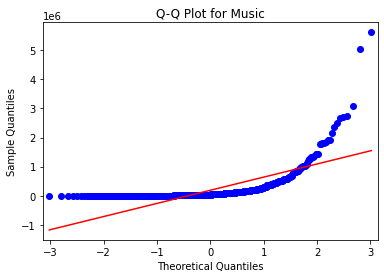

In [80]:
sm.qqplot(Music, line='s')
pylab.title('Q-Q Plot for Music')
pylab.show()

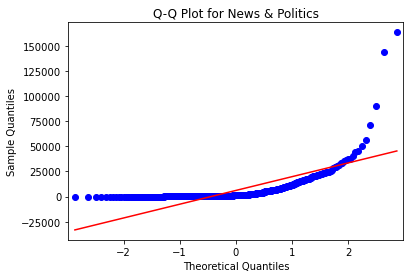

In [81]:
sm.qqplot(News_Politics, line='s')
pylab.title('Q-Q Plot for News & Politics')
pylab.show()

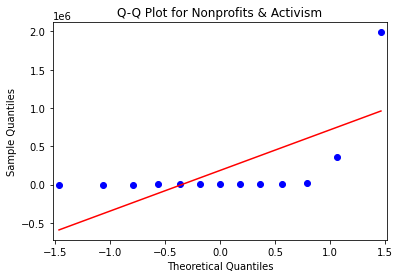

In [82]:
sm.qqplot(Nonprofits_Activism, line='s')
pylab.title('Q-Q Plot for Nonprofits & Activism')
pylab.show()

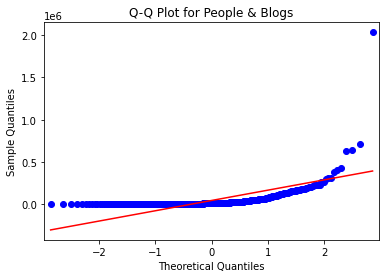

In [83]:
sm.qqplot(People_Blogs, line='s')
pylab.title('Q-Q Plot for People & Blogs')
pylab.show()

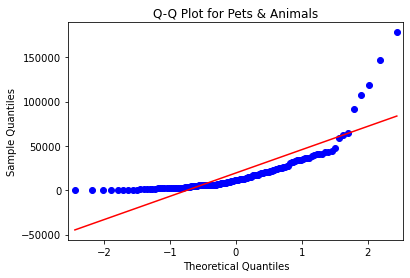

In [84]:
sm.qqplot(Pets_Animals, line='s')
pylab.title('Q-Q Plot for Pets & Animals')
pylab.show()

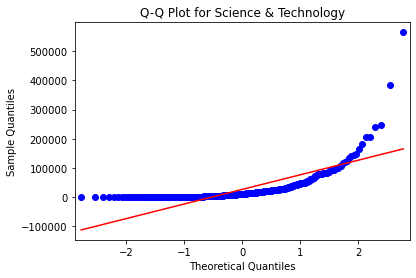

In [85]:
sm.qqplot(Science_Technology, line='s')
pylab.title('Q-Q Plot for Science & Technology')
pylab.show()

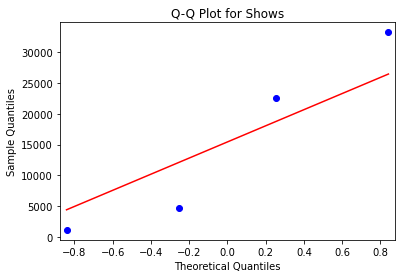

In [86]:
sm.qqplot(Shows, line='s')
pylab.title('Q-Q Plot for Shows')
pylab.show()

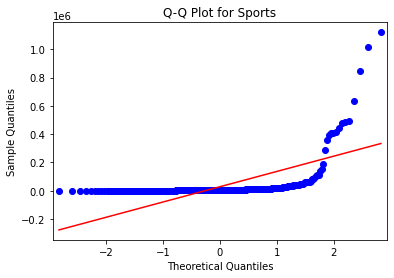

In [87]:
sm.qqplot(Sports, line='s')
pylab.title('Q-Q Plot for Sports')
pylab.show()

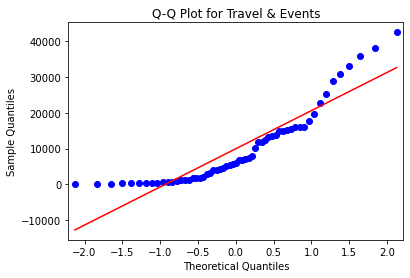

In [88]:
sm.qqplot(Travel_Events, line='s')
pylab.title('Q-Q Plot for Travel & Events')
pylab.show()

In [132]:
scipy.stats.levene(data1['likes'],data2['likes'],data3['likes'],data4['likes'],data5['likes'],data6['likes'],
                   data7['likes'],data8['likes'],data9['likes'],data10['likes'],data11['likes'],data12['likes'],
                   data13['likes'],data14['likes'],data15['likes'],data16['likes'])

LeveneResult(statistic=26.14831123986629, pvalue=3.777815317823111e-71)

In [133]:
# p-value < 0.05, reject H0, there is no homogeneity of variance.

In [134]:
# anova can not be applied in this case.
# nonparametric may be more suitable.
# Kruskal-Wallis H Test may be considered.
# H0: There is no difference between the medians.
# H1: At least, one median is different from others.

In [89]:
scipy.stats.kruskal(Autos_Vehicles,Comedy,Education,Entertainment,Film_Animation,Gaming,Howto_Style,Music,News_Politics,
                   Nonprofits_Activism,People_Blogs,Pets_Animals,Science_Technology,Shows,Sports,Travel_Events)

KruskalResult(statistic=948.4053041163667, pvalue=1.5276337746033118e-192)

In [90]:
# p-value < 0.05, reject H0, there is at least one group different from others.
# Category is a important factor influece the likes.